In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 0.0 Data import

In [28]:
df0 = pd.read_csv("base_modelo.csv", index_col="id")
df0.columns = df0.columns.str.lower()
test = df0[df0['safra']<=201406]
df0 = df0[df0['safra']>=201407]
print( df0.shape, test.shape )
df0.head(3)

(5284, 80) (5454, 80)


,safra,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78
id,,,,,,,,,,,,,,,,,,,,,
2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,NaN,...,707.84,NaN,NaN,187.0,NaN,NaN,NaN,184.69,54.0,NaN
4,201412,0,0.0,0.0,0.0,0.0,10.58,3796.0,NaN,NaN,...,119.96,23.0,0.0,417.0,0.0,0.0,NaN,NaN,0.0,0.0
8,201409,0,0.0,0.0,0.0,0.0,NaN,301.0,NaN,NaN,...,NaN,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN


# 1.0 Data Description

## 1.1 data types

In [29]:
df1 = df0.copy()

In [30]:
df1.dtypes.nunique()

2

In [31]:
df1.dtypes

safra       int64
y           int64
var_1     float64
var_2     float64
var_3     float64
           ...   
var_74    float64
var_75    float64
var_76    float64
var_77    float64
var_78    float64
Length: 80, dtype: object

## 1.2 null values

In [32]:
(df1.isnull().sum()/len(df1)).sort_values(ascending=False)

var_62    0.767790
var_70    0.753596
var_61    0.702687
var_47    0.683952
var_16    0.683952
            ...   
var_60    0.000000
y         0.000000
var_57    0.000000
var_20    0.000000
safra     0.000000
Length: 80, dtype: float64

## 1.3 data dimension

In [33]:
df1.shape

(5284, 80)

# 2.0 FEATURE ENGINEERING

In [34]:
df2 = df1.copy()

# 3.0 FEATURE FILTERING

In [35]:
df3 = df2.copy()

# 4.0 EDA

In [36]:
df4 = df3.copy()

In [37]:
df4['y'].mean()

0.30299015897047693

In [38]:
df4['safra'].value_counts().sort_index()

201407    968
201408    912
201409    877
201410    933
201411    808
201412    786
Name: safra, dtype: int64

# 5.0 DATA PREPARATION

In [39]:
df5 = df4.copy()

# 6.0 FEATURE SELECTION

In [40]:
df6 = df5.copy()

## 6.1 Split into train and test

In [41]:
Xtrain, ytrain = df6.drop(['y'], axis=1) , df6['y']
Xtest, ytest = test.drop(['y'], axis=1) , test['y']

# 7.0 Machine Learning Modeling

In [42]:
df7 = df6.copy()
df6['y'].mean()

0.30299015897047693

In [58]:
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_fscore_support, accuracy_score
from xgboost import plot_importance
import numpy as np

def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

In [53]:
#model
xgbc = XGBClassifier( n_estimators=100, random_state=42, objective='binary:logistic').fit( Xtrain, ytrain )

ypred = xgbc.predict(Xtrain)

precision_recall_fscore_support(ytrain, ypred)

(array([0.99485234, 0.99309479]),
 array([0.9970133 , 0.98813242]),
 array([0.99593165, 0.99060739]),
 array([3683, 1601], dtype=int64))

In [54]:
ypred = xgbc.predict(Xtest)

precision_recall_fscore_support(ytest, ypred)

(array([0.82652571, 0.62306502]),
 array([0.87598676, 0.52717747]),
 array([0.85053777, 0.57112451]),
 array([3927, 1527], dtype=int64))

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

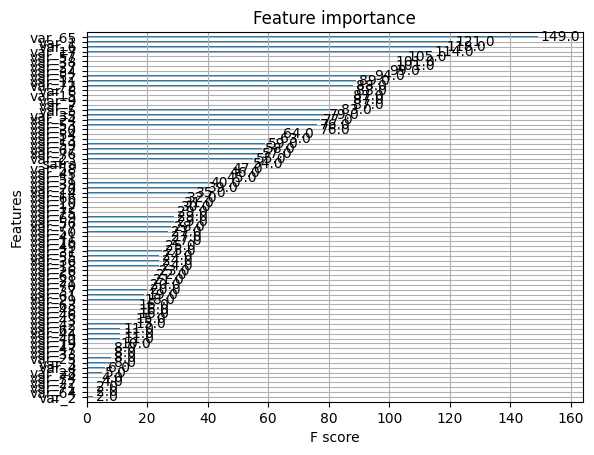

In [59]:
plot_importance(xgbc)

In [56]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrain, Xtest, ytrain, ytest)

print(models)

100%|██████████| 29/29 [00:46<00:00,  1.60s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.78               0.70     0.70      0.77   
XGBClassifier                      0.78               0.69     0.69      0.77   
AdaBoostClassifier                 0.76               0.68     0.68      0.76   
LinearDiscriminantAnalysis         0.80               0.68     0.68      0.78   
LinearSVC                          0.80               0.68     0.68      0.78   
ExtraTreesClassifier               0.78               0.67     0.67      0.76   
RidgeClassifier                    0.80               0.67     0.67      0.77   
RidgeClassifierCV                  0.80               0.67     0.67      0.77   
LogisticRegression                 0.80               0.67     0.67      0.77   
CalibratedClassifierCV             0.80               0.67     0.67      0.77   
RandomForestClassifier      